Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.

Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 

Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.

**Rademacher complexity**:  
Suppose now that the labels $y_i$ are chosen at random without regard to the $x_i$. In other words, suppose we replace each $y_i$ by a random variable $\sigma_i$ that is −1 or +1 with
equal probability, independent of everything else. Thus, the $\sigma_i$ represent labels that are pure noise. We can measure how well the space $H$ can fit this noise in expectation
by  
$E_{sigma} [\max_{h \in H} \frac 1 m \sum _{i=1}^m \sigma_i h(x_i)]$, which is called Rademacher complexity.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [207]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [206]:
cancer = load_breast_cancer()

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(cancer.target)

В scikit-learn параметр альфа нельзя задать, но можно задать С,   
$C = \frac 1 \alpha\$

In [182]:
sigma = np.array([-1] * int(np.ceil(len(y_train) / 2)) + [1] * (len(y_train) - int(np.ceil(len(y_train) / 2))))
np.random.shuffle(sigma)

In [186]:
def data_split(cancer, seed):
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, y, stratify=y,
                                                        test_size=0.2, random_state=seed)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test
    
def experiment(X_train, y_train, seed, alpha):    
    sigma = np.array([-1] * int(np.ceil(len(y_train) / 2)) + [1] * (len(y_train) - int(np.ceil(len(y_train) / 2))))
    np.random.shuffle(sigma)
    
    log_reg = LogisticRegression(C=1/alpha, solver='liblinear', penalty='l2', random_state=seed)
    log_reg.fit(X_train, y_train)
    h = log_reg.decision_function(X_train)
    margin = h * sigma

    expected_val = np.average(margin, weights=sigma)
    return expected_val

In [229]:
stds = []
rademacher = []
for a in alpha:
    seed = list(set([random.randint(1, 5000) for i in range(1000)]))
    k = 1
    expected = []
    while k <= 100:
        X_train, X_test, y_train, y_test = data_split(cancer, seed[k])
        expected_val = experiment(X_train, y_train, seed[k], alpha=a)
        expected.append(expected_val)
        k += 1
    expected_val_mean = np.sum(expected) / 100
    rademacher.append(expected_val_mean)
    stds.append(np.std(expected))

In [230]:
stds

[372.63695802278164,
 147.43366234432798,
 54.70684945630186,
 15.253656649025046,
 2.133788925165023]

In [231]:
rademacher

[966.8567082684317,
 211.5687239324625,
 -102.15891693351622,
 -152.74315733807086,
 -85.9172426460682]

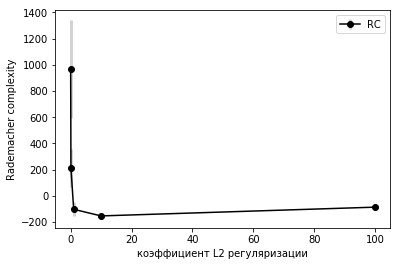

In [232]:
# место для графиков
plt.errorbar(alpha, rademacher, stds, fmt='-o', color='black', ecolor='lightgray', elinewidth=3, label='RC')
plt.xlabel('коэффициент L2 регуляризации')
plt.ylabel('Rademacher complexity')
plt.legend()
plt.show()

При увеличении коэффициента регуляризации L2 alpha сложность по Радемахеру стремительно падает на малых значениях (от 0 до 1), а потом, на больших значениях (100), она снова начинает расти.   
Стандартное отклонение сложности по Радемахеру при увеличении альфа только падает.